In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel("Sexual Harassment Data for Machine Learning Project.xlsx")
df.head()


,Area,Zone,Time,People.Frequency,Is.Police_Station,Is.Bar,Tier,Residence.Level,Class
0,Ramapuram,Aanandam Nagar,Morning,Medium,Yes,No,Middle,Medium,Safe
1,Ramapuram,Aanandam Nagar,Afternoon,High,Yes,No,Middle,Medium,Safe
2,Ramapuram,Aanandam Nagar,Evening,Medium,Yes,No,Middle,Medium,Safe
3,Ramapuram,Aanandam Nagar,Night,Low,Yes,No,Middle,Medium,Safe
4,Ramapuram,Ambal Nagar,Morning,Medium,No,No,Outer,Medium,Safe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               104 non-null    object
 1   Zone               104 non-null    object
 2   Time               104 non-null    object
 3   People.Frequency   104 non-null    object
 4   Is.Police_Station  104 non-null    object
 5   Is.Bar             104 non-null    object
 6   Tier               104 non-null    object
 7   Residence.Level    104 non-null    object
 8   Class              104 non-null    object
dtypes: object(9)
memory usage: 7.4+ KB


In [4]:
df.isnull().sum()/len(df)*100

Area                 0.0
Zone                 0.0
Time                 0.0
People.Frequency     0.0
Is.Police_Station    0.0
Is.Bar               0.0
Tier                 0.0
Residence.Level      0.0
Class                0.0
dtype: float64

In [5]:
duplicates=df[df.duplicated()]

In [6]:
df['Class']=df['Class'].round(2)

In [7]:
lb=LabelEncoder()
df['Class']=lb.fit_transform(df['Class'])

In [8]:
df_onehot = pd.get_dummies(df, drop_first=True)

# Show the first few rows
print(df_onehot.head())

   Class  Area_Ramapuram  Area_West Mambalam  Zone_Ambal Nagar  \
0      0            True               False             False   
1      0            True               False             False   
2      0            True               False             False   
3      0            True               False             False   
4      0            True               False              True   

   Zone_Amman Nagar  Zone_Baktavatsalm Nagar  Zone_Chidambaram Nagar  \
0             False                    False                   False   
1             False                    False                   False   
2             False                    False                   False   
3             False                    False                   False   
4             False                    False                   False   

   Zone_Easwaran Nagar  Zone_Gokulam Colony  Zone_Kasi Viswanathar Colony  \
0                False                False                         False   
1               

In [9]:
import pandas as pd

# Assuming your dataframe is named df
df_encoded = pd.get_dummies(df, columns=['Area', 'Zone', 'Time', 'People.Frequency', 'Is.Police_Station', 'Is.Bar', 'Tier', 'Residence.Level'])

# Display the resulting dataframe
print(df_encoded)


     Class  Area_Adyar  Area_Ramapuram  Area_West Mambalam  \
0        0       False            True               False   
1        0       False            True               False   
2        0       False            True               False   
3        0       False            True               False   
4        0       False            True               False   
..     ...         ...             ...                 ...   
99       1       False            True               False   
100      0       False           False                True   
101      0       False           False                True   
102      0       False           False                True   
103      1       False           False                True   

     Zone_Aanandam Nagar  Zone_Ambal Nagar  Zone_Amman Nagar  \
0                   True             False             False   
1                   True             False             False   
2                   True             False             False   

In [10]:
 #Check column names to ensure one-hot encoding has applied
print(df_encoded.columns)

# Check the data types of each column
print(df_encoded.dtypes)


Index(['Class', 'Area_Adyar', 'Area_Ramapuram', 'Area_West Mambalam',
       'Zone_Aanandam Nagar', 'Zone_Ambal Nagar', 'Zone_Amman Nagar',
       'Zone_Baktavatsalm Nagar', 'Zone_Chidambaram Nagar',
       'Zone_Easwaran Nagar', 'Zone_Gokulam Colony',
       'Zone_Kasi Viswanathar Colony', 'Zone_Moogambigai Nagar',
       'Zone_Moovendar Colony', 'Zone_Mullai Nagar', 'Zone_Pannerselvam Nagar',
       'Zone_Postal Colony', 'Zone_RamaKrishnapuram', 'Zone_Royala Nagar',
       'Zone_Sakthi Nagar', 'Zone_Shastri Nagar',
       'Zone_South Kesavaperumalpuram', 'Zone_Subramaniam Nagar',
       'Zone_Suresh Nagar', 'Zone_Tamil Nagar', 'Zone_Teachers Colony',
       'Zone_Thiru Nagar', 'Zone_Venkateshwar Nagar',
       'Zone_Venkateshwara Nagar', 'Zone_Vivekanandapuram', 'Time_Afternoon',
       'Time_Evening', 'Time_Morning', 'Time_Night', 'People.Frequency_High',
       'People.Frequency_Low', 'People.Frequency_Medium',
       'Is.Police_Station_No', 'Is.Police_Station_Yes', 'Is.Bar_No',
  

In [11]:
# Checking if columns contain binary values (0 and 1)
for col in df.columns:
    print(f"Column: {col}, Unique values: {df[col].unique()}")


Column: Area, Unique values: ['Ramapuram' 'Adyar' 'West Mambalam']
Column: Zone, Unique values: ['Aanandam Nagar' 'Ambal Nagar' 'Amman Nagar' 'Baktavatsalm Nagar'
 'Chidambaram Nagar' 'Easwaran Nagar' 'Gokulam Colony'
 'Kasi Viswanathar Colony' 'Moogambigai Nagar' 'Moovendar Colony'
 'Mullai Nagar' 'Pannerselvam Nagar' 'Postal Colony' 'RamaKrishnapuram'
 'Royala Nagar' 'Sakthi Nagar' 'Shastri Nagar' 'South Kesavaperumalpuram'
 'Subramaniam Nagar' 'Suresh Nagar' 'Tamil Nagar' 'Teachers Colony'
 'Thiru Nagar' 'Venkateshwar Nagar' 'Venkateshwara Nagar'
 'Vivekanandapuram']
Column: Time, Unique values: ['Morning' 'Afternoon' 'Evening' 'Night']
Column: People.Frequency, Unique values: ['Medium' 'High' 'Low']
Column: Is.Police_Station, Unique values: ['Yes' 'No']
Column: Is.Bar, Unique values: ['No' 'Yes']
Column: Tier, Unique values: ['Middle' 'Outer' 'Inner']
Column: Residence.Level, Unique values: ['Medium' 'Low' 'High']
Column: Class, Unique values: [0 1]


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

def handle_numerical_feature(df, target_column=True, corr_threshold=0.1):
    # One-hot encode categorical columns first
    df = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids dummy variable trap
    print("One-hot encoding applied")

    # Handle skewness
    for col in df.select_dtypes(include=['number']).columns:
        if skew(df[col]) > 1:  # Check for right skew
            df[col] = np.log1p(df[col])  # Apply log1p transformation to reduce skew
            print(f"Applied log transformation to reduce skew in {col}")
    
    # Handle outliers
    for col in df.select_dtypes(include=['number']).columns:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        low_bound, up_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df[col] = np.clip(df[col], low_bound, up_bound)  # Clip outliers
        print(f"Clipped outliers in {col}")
    
    # Scale features
    scalar = StandardScaler()
    num_cols = df.select_dtypes(include=['number']).columns
    df[num_cols] = scalar.fit_transform(df[num_cols])  # Standardize numerical features
    print("Standardized numerical features")
    
    # Correlation with target
    if target_column:
        corr_mat = df.corr()[target_column].abs().sort_values(ascending=False)  # Absolute correlation with target
        print("\nCorrelation with target:")
        print(corr_mat)
        
        # Drop features with low correlation with the target
        low_corr_cols = corr_mat[corr_mat < corr_threshold].index.tolist()
        if low_corr_cols:
            df.drop(columns=low_corr_cols, inplace=True)
            print(f"Dropped low correlation columns: {low_corr_cols}")
    
    return df

# Apply function on the dataframe
df = handle_numerical_feature(df, target_column='Class', corr_threshold=0.1)


One-hot encoding applied
Clipped outliers in Class
Standardized numerical features

Correlation with target:
Class                            1.000000
Time_Night                       0.465177
Tier_Outer                       0.446290
Is.Police_Station_Yes            0.416554
People.Frequency_Low             0.395248
Residence.Level_Low              0.377981
Tier_Middle                      0.227823
Zone_Tamil Nagar                 0.185933
Zone_Moogambigai Nagar           0.185933
Zone_Venkateshwar Nagar          0.185933
Zone_Pannerselvam Nagar          0.185933
People.Frequency_Medium          0.165657
Is.Bar_Yes                       0.141171
Zone_Postal Colony               0.136351
Zone_Shastri Nagar               0.136351
Zone_Mullai Nagar                0.136351
Zone_Easwaran Nagar              0.136351
Zone_RamaKrishnapuram            0.136351
Zone_Teachers Colony             0.136351
Time_Morning                     0.107348
Area_West Mambalam               0.079209
Zone_Sout

In [13]:
#univariate analysis
def handle_numerical_feature(df,target_column=True,corr_treshold=0.1):
    #handle skew
    for col in df.select_dtypes(include=['number']).columns:
        if skew(df[col])>1:
            df[col]=np.log1p(df[col])
            print(f"Applied log transformation to reduce skew in {col}")
    #handle outliers
    for col in df.select_dtypes(include=['number']).columns:
        q1,q3=df[col].quantile([0.25,0.75])
        iqr=q3-q1
        low_bound,up_bound=q1-1.5*iqr,q3+1.5*iqr
        df[col]=np.clip(df[col],low_bound,up_bound)
        print(f"clipped outliers in {col}")
    #scale features
    scalar=StandardScaler()
    num_cols=df.select_dtypes(include=['number']).columns
    df[num_cols]=scalar.fit_transform(df[num_cols])
    print("standardised numerical features")
    if target_column:
        corr_mat=df.corr()[target_column].abs().sort_values(ascending=False)
        print("\n Correlation with target")
        print(corr_mat)
        low_corr_cols=corr_mat[corr_mat<corr_treshold].index.tolist()
        if low_corr_cols:
            df.drop(columns=low_corr_cols,inplace=True)
            print(f"Dropped low correlation columns:{low_corr_cols}")
    return df
df=handle_numerical_feature(df,target_column='Class',corr_treshold=0.1)
    

clipped outliers in Class
standardised numerical features

 Correlation with target
Class                      1.000000
Time_Night                 0.465177
Tier_Outer                 0.446290
Is.Police_Station_Yes      0.416554
People.Frequency_Low       0.395248
Residence.Level_Low        0.377981
Tier_Middle                0.227823
Zone_Tamil Nagar           0.185933
Zone_Moogambigai Nagar     0.185933
Zone_Venkateshwar Nagar    0.185933
Zone_Pannerselvam Nagar    0.185933
People.Frequency_Medium    0.165657
Is.Bar_Yes                 0.141171
Zone_Postal Colony         0.136351
Zone_Shastri Nagar         0.136351
Zone_Mullai Nagar          0.136351
Zone_RamaKrishnapuram      0.136351
Zone_Teachers Colony       0.136351
Zone_Easwaran Nagar        0.136351
Time_Morning               0.107348
Name: Class, dtype: float64


In [14]:
# Apply one-hot encoding first
df = pd.get_dummies(df, drop_first=True)  # Apply one-hot encoding and drop the first column to avoid dummy variable trap


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Print column names to verify
print(df.columns)

Index(['Class', 'Zone_Easwaran Nagar', 'Zone_Moogambigai Nagar',
       'Zone_Mullai Nagar', 'Zone_Pannerselvam Nagar', 'Zone_Postal Colony',
       'Zone_RamaKrishnapuram', 'Zone_Shastri Nagar', 'Zone_Tamil Nagar',
       'Zone_Teachers Colony', 'Zone_Venkateshwar Nagar', 'Time_Morning',
       'Time_Night', 'People.Frequency_Low', 'People.Frequency_Medium',
       'Is.Police_Station_Yes', 'Is.Bar_Yes', 'Tier_Middle', 'Tier_Outer',
       'Residence.Level_Low'],
      dtype='object')


In [18]:
# Feature columns
X = df[[
    'Zone_Easwaran Nagar', 'Zone_Moogambigai Nagar', 'Zone_Mullai Nagar',
    'Zone_Pannerselvam Nagar', 'Zone_Postal Colony', 'Zone_RamaKrishnapuram',
    'Zone_Shastri Nagar', 'Zone_Tamil Nagar', 'Zone_Teachers Colony',
    'Zone_Venkateshwar Nagar', 'Time_Morning', 'Time_Night', 
    'People.Frequency_Low', 'People.Frequency_Medium',
    'Is.Police_Station_Yes', 'Is.Bar_Yes', 'Tier_Middle', 'Tier_Outer', 
    'Residence.Level_Low'
]]

# Target variable
Y = df['Class']

In [22]:
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
Y_train_encoded = le.fit_transform(Y_encoded)

# Check the unique values after encoding (it should be [0, 1])
print(le.classes_)  # This will print the corresponding label mapping, e.g., ['safe', 'unsafe']

# Now, you can train the model


[0 1]


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
Y_train_encoded = le.fit_transform(Y_train)

# Check the unique values after encoding (it should be [0, 1])
print(le.classes_)  # This will print the corresponding label mapping, e.g., ['safe', 'unsafe']

# Now, you can train the model


[0 1]


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [27]:

Y_predict=rf_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
print("RMSE",mean_squared_error(Y_test,Y_predict,squared=False))

RMSE 0.4879500364742666


C:\Users\SHANMATHI ILANGOVAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
from sklearn.metrics import r2_score
print("testing score:",r2_score(Y_test,Y_predict))

testing score: -0.07142857142857162


In [31]:
print("training score:",rf_model.score(X_train,Y_train))

training score: 1.0


In [32]:
Y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(Y_test, Y_pred) * 100)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 76.19047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.62      0.71      0.67         7

    accuracy                           0.76        21
   macro avg       0.74      0.75      0.74        21
weighted avg       0.77      0.76      0.77        21



In [33]:
print("Training Accuracy:", rf_model.score(X_train, Y_train) * 100)

Training Accuracy: 100.0


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [45]:
X_train.dtypes

Zone_Easwaran Nagar        bool
Zone_Moogambigai Nagar     bool
Zone_Mullai Nagar          bool
Zone_Pannerselvam Nagar    bool
Zone_Postal Colony         bool
Zone_RamaKrishnapuram      bool
Zone_Shastri Nagar         bool
Zone_Tamil Nagar           bool
Zone_Teachers Colony       bool
Zone_Venkateshwar Nagar    bool
Time_Morning               bool
Time_Night                 bool
People.Frequency_Low       bool
People.Frequency_Medium    bool
Is.Police_Station_Yes      bool
Is.Bar_Yes                 bool
Tier_Middle                bool
Tier_Outer                 bool
Residence.Level_Low        bool
dtype: object

In [36]:
X_train = X_train.astype(int)


In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)


In [38]:
rf_model.fit(X_res, Y_res)


RandomForestClassifier(random_state=42)

In [39]:
Y_predict = rf_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.95%


In [52]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.64      1.00      0.78         7

    accuracy                           0.81        21
   macro avg       0.82      0.86      0.81        21
weighted avg       0.88      0.81      0.81        21



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42)
random_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estima

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42)
random_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estima

C:\Users\SHANMATHI ILANGOVAN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHANMATHI ILANGOVAN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHANMATHI ILANGOVAN\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SHANMATHI ILANGOVAN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_const

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_accuracy = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Average cross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))


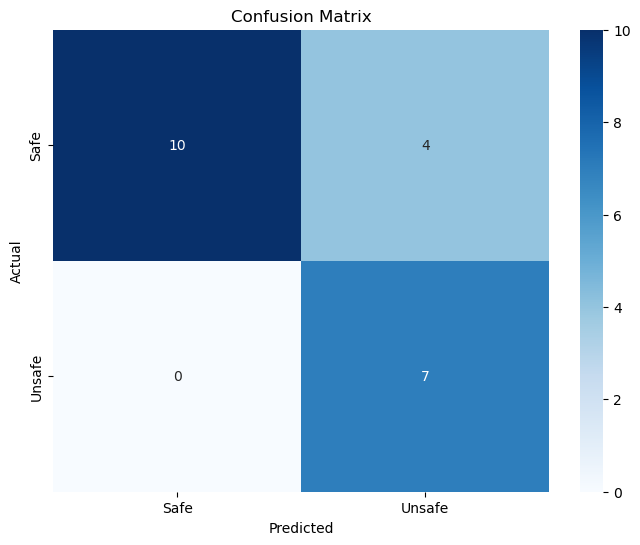

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicting the test data
y_pred = rf_model.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the column names that were used during training
train_columns = ['Zone_Easwaran Nagar', 'Zone_Moogambigai Nagar', 'Zone_Mullai Nagar', 
                 'Zone_Pannerselvam Nagar', 'Zone_Postal Colony', 'Zone_RamaKrishnapuram', 
                 'Zone_Shastri Nagar', 'Zone_Tamil Nagar', 'Zone_Teachers Colony', 
                 'Zone_Venkateshwar Nagar', 'Time_Morning', 'Time_Night', 
                 'People.Frequency_Low', 'People.Frequency_Medium', 'Is.Police_Station_Yes', 
                 'Is.Bar_Yes', 'Tier_Middle', 'Tier_Outer', 'Residence.Level_Low']

# Example new data input
new_data = {
    'Zone_Easwaran Nagar': 1,
    'Zone_Moogambigai Nagar': 0,
    'Zone_Mullai Nagar': 0,
    'Zone_Pannerselvam Nagar': 0,
    'Zone_Postal Colony': 0,
    'Zone_RamaKrishnapuram': 0,
    'Zone_Shastri Nagar': 0,
    'Zone_Tamil Nagar': 0,
    'Zone_Teachers Colony': 0,
    'Zone_Venkateshwar Nagar': 0,
    'Time_Morning': 1,
    'Time_Night': 0,
    'People.Frequency_Low': 1,
    'People.Frequency_Medium': 0,
    'Is.Police_Station_Yes': 0,
    'Is.Bar_Yes': 0,
    'Tier_Middle': 1,
    'Tier_Outer': 0,
    'Residence.Level_Low': 1
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame([new_data])

# Ensure new data has the same columns as the training data
for col in train_columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0  # Add missing columns with default value (0)

# Reorder columns to match the training data order
new_data_df = new_data_df[train_columns]

# Assuming you have a fitted scaler from training
# Fit the scaler with your training data (example: X_train)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data (X_train should be your training features)

# Now transform the new data
new_data_scaled = scaler.transform(new_data_df)

# Assuming you have a trained RandomForest model `rf_model`
prediction = rf_model.predict(new_data_scaled)

# Output the prediction
print(f"The prediction for the new data is: {'Unsafe' if prediction[0] == 1 else 'Safe'}")


In [66]:
pip install pandas folium seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_excel("Sexual Harassment Data for Machine Learning Project.xlsx")  


In [ ]:
import pandas as pd

df = pd.read_excel("Sexual Harassment Data for Machine Learning Project.xlsx")  # Replace with actual file path

print(df.columns)


In [ ]:
df_encoded = pd.get_dummies(df, columns=[
    'Zone', 'Time', 'People.Frequency', 'Is.Police_Station', 
    'Is.Bar', 'Tier', 'Residence.Level'
])

In [ ]:
# Define a risk score manually
df['Risk_Score'] = (
    (df['Is.Bar'] == 'Yes').astype(int) +
    (df['People.Frequency'] == 'Low').astype(int) +
    (df['Time'] == 'Night').astype(int) -
    (df['Is.Police_Station'] == 'Yes').astype(int)
)

In [ ]:
import numpy as np

# Assign random lat/lon for demo based on unique zones
zone_centroids = {
    zone: [13 + np.random.rand()/100, 80 + np.random.rand()/100]
    for zone in df['Zone'].unique()
}

# Map lat/lon from zone
df['Latitude'] = df['Zone'].map(lambda z: zone_centroids[z][0])
df['Longitude'] = df['Zone'].map(lambda z: zone_centroids[z][1])


In [ ]:
# Initialize map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=13)

# Prepare heat data
heat_data = [
    [row['Latitude'], row['Longitude'], row['Risk_Score']]
    for _, row in df.iterrows()
]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(heatmap_map)

# Save and show
heatmap_map.save("women_safety_heatmap.html")
print("✅ Heatmap created! Open 'women_safety_heatmap.html' in your browser.")


In [ ]:
import webbrowser

# Open the file in default browser
webbrowser.open("women_safety_heatmap.html")
